In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data() # No need for labels because we are building an Unsupervised Learning

In [7]:
# Normalize the data to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [11]:
# Add noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the noisy images to ensure pixel values are within [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Reshape the data to include the channel dimension (required for Conv2D layers)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
x_train_noisy = np.reshape(x_train_noisy, (len(x_train_noisy), 28, 28, 1))
x_test_noisy = np.reshape(x_test_noisy, (len(x_test_noisy), 28, 28, 1))

In [44]:
def Autoencoder(input_shape=(28, 28, 1)):
    Model = Sequential([
        # Input Layer
        layers.Input(shape=input_shape),
        
        # Encoder
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), padding='same'),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), padding='same'),
    
        # Decoder
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.UpSampling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.UpSampling2D((2, 2)),
        layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
    ])

    return Model

In [46]:
Autoencoder().summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
Denoising_Model = Autoencoder()
Denoising_Model.compile(optimizer='adam',
                    loss='binary_crossentropy')
history = Denoising_Model.fit(
    x_train_noisy, x_train,  # Noisy images as input, original images as target
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 65ms/step - loss: 0.2421 - val_loss: 0.1173
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 65ms/step - loss: 0.1163 - val_loss: 0.1097
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 63ms/step - loss: 0.1091 - val_loss: 0.1050
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 63ms/step - loss: 0.1054 - val_loss: 0.1023
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 63ms/step - loss: 0.1028 - val_loss: 0.1008
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 63ms/step - loss: 0.1013 - val_loss: 0.0993
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - loss: 0.1001 - val_loss: 0.0984
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 67ms/step - loss: 0.0992 - val_loss: 0.0978
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 68ms/step - loss: 0.0984 - val_loss: 0.0978
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 65ms/step - loss: 0.0976 - val_loss: 0.0965
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - loss: 0.0973 - val_loss: 0.0963
Epoch 12/20
469/469 ━━━━━━━━━━

In [98]:
def Image_Denoiser(noisyImage):
    # image = Image.open(noisyImage).convert('L')  # Convert to grayscale
    # image = image.resize((28, 28))
    # image_array = np.array(image)
    # image_array = image_array.astype('float32') / 255.0
    # image_array = np.reshape(image_array, (1, 28, 28, 1))
    # Denoise the image
    denoised_image_array = Denoising_Model.predict(noisyImage)
    # Reshape the output to 2D (remove batch and channel dimensions)
    denoised_image_array = denoised_image_array.reshape(28, 28)
    image_array = noisyImage.reshape(28, 28)

    # Display the images
    plt.figure(figsize=(10, 4))
    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(image_array, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Denoised image
    plt.subplot(1, 3, 2)
    plt.imshow(denoised_image_array, cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

    plt.show()
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


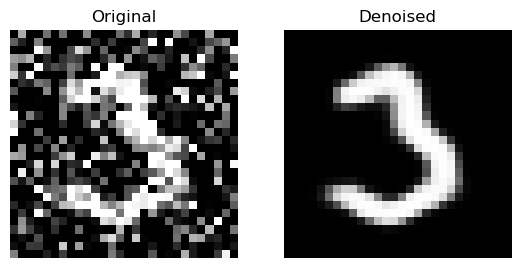

In [104]:
Image_Denoiser(x_test_noisy[-4].reshape(1, 28, 28, 1))